# Flight Price Prediction Case Study

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Loading the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Uploading the the data set
data_train =pd.read_csv('train_Flight-price.csv')
data_test=pd.read_csv('test_Flight-price.csv')


In [4]:
ds=pd.DataFrame(data=data_train)
dsTest=pd.DataFrame(data=data_test)
ds

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

# EDA

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There are 10683 rows and 11 columns. Except Price all are object type varibale. Target varibale is continous and interger type.

In [6]:
dsTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Test Data has 2671 rows and 6 columns. All are Object type columns

In [7]:
# Checking missing values
ds.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are missing values in Destination and Total-Info columns, but it is just 2 values, which can be ignorant.

<AxesSubplot:>

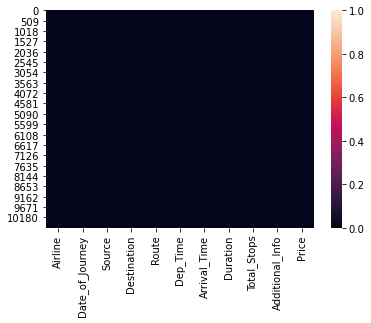

In [8]:
sns.heatmap(ds.isnull())

The heat map shows no sign of missing values since number of missing values are minimal.

In [9]:
#As we can observe ‘Route’ and ‘Total_Stops’ both just 2 missing values. In this case, it is better to drop missing values.
ds.dropna(inplace= True)
ds.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

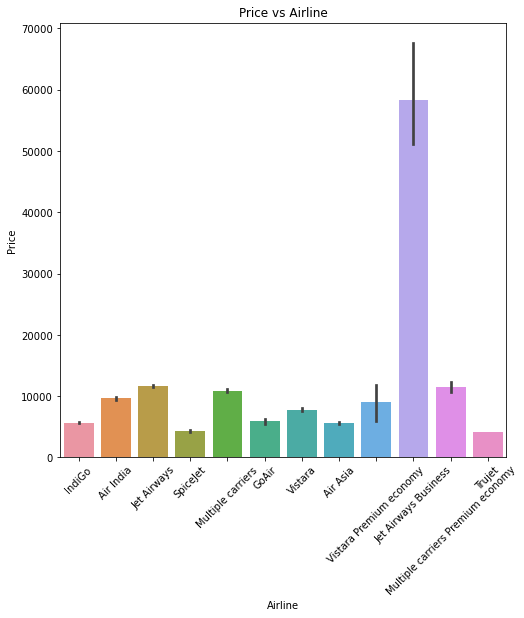

In [11]:
plt.figure(figsize=(8,8))
sns.barplot(x='Airline',y='Price',data=ds)
plt.title("Price vs Airline")
plt.xticks(rotation=45)
plt.show()

From graph we can see that Vistara Prmium Economy and Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

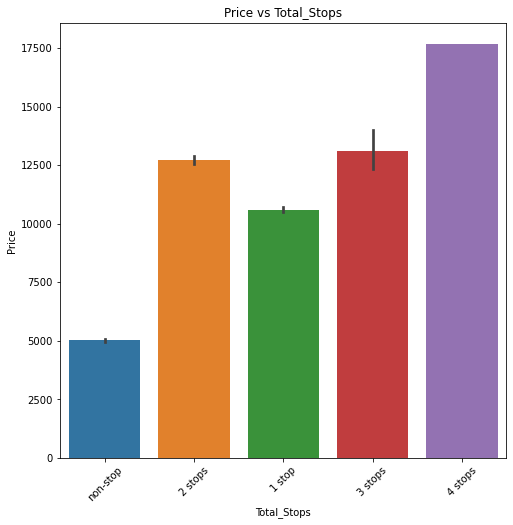

In [12]:
plt.figure(figsize=(8,8))
sns.barplot(x='Total_Stops',y='Price',data=ds)
plt.title("Price vs Total_Stops")
plt.xticks(rotation=45)
plt.show()

Key Observation: As the number of stops increases the price of fflight also increases.

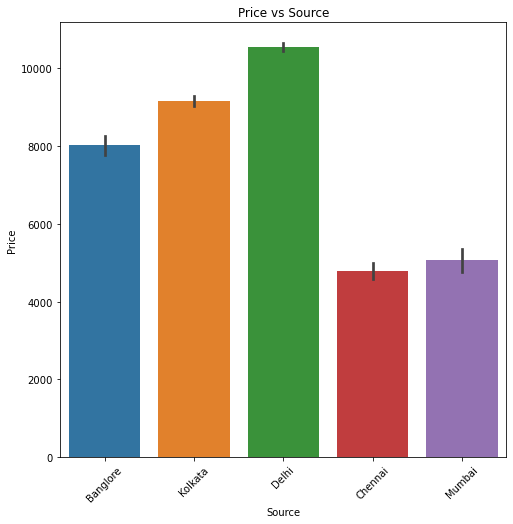

In [13]:
plt.figure(figsize=(8,8))
sns.barplot(x='Source',y='Price',data=ds)
plt.title("Price vs Source")
plt.xticks(rotation=45)
plt.show()

Key Observation: The flights with source Delhi has the the highest flight price then Kolkata and Banglore respectively

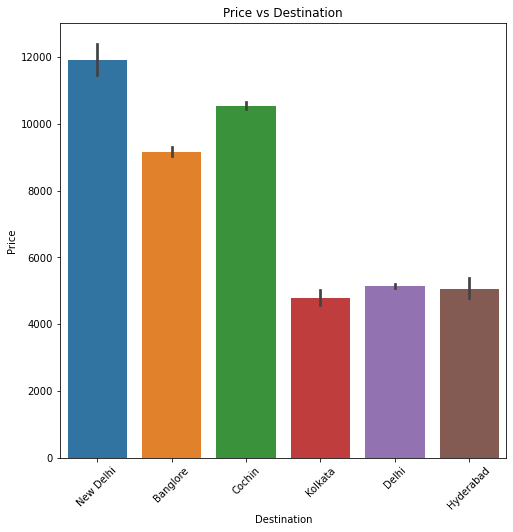

In [15]:
plt.figure(figsize=(8,8))
sns.barplot(x='Destination',y='Price',data=ds)
plt.title("Price vs Destination")
plt.xticks(rotation=45)
plt.show()

Key Observation: The flights with destination Delhi has the the highest flight price then Banglore, cochin respectively

<AxesSubplot:xlabel='Duration', ylabel='Price'>

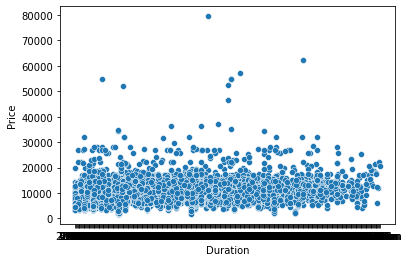

In [16]:
#duration v/s AveragePrice
sns.scatterplot(data=ds, x='Duration', y='Price')

We know that duration is important and plays a major role in affecting air ticket prices but we see no such pattern here, there must be other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight.

Data Wrangling

In [20]:
#firstly lets convert Date_of_journey,Arrival_Time and Dep_Time variables into date and time for proper predicion
def change_into_datetime(col):
    ds[col]=pd.to_datetime(ds[col])

In [21]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [22]:
# Now we extract day and month from Date_of_journey and stored in 2 other columns
ds['journey-day']=ds['Date_of_Journey'].dt.day
ds['journey-month']=ds['Date_of_Journey'].dt.month

In [23]:
#now can drop 'Date_of_Journey' column
ds.drop('Date_of_Journey', axis=1, inplace=True)

In [24]:
# function for extracting hour and minutes From Arrival_time and Dept_time
def extract_hour(ds,col):
    ds[col+'_hour']=ds[col].dt.hour
    
def extract_min(ds,col):
    ds[col+'_min']=ds[col].dt.minute
    

def drop_col(ds,col):
    ds.drop(col,axis=1,inplace=True)


In [25]:
#call the function,Departure time is when a plane leaves the gate. 
# Similarly to Date_of_Journey,we can extract values from Dep_Time
extract_hour(ds,'Dep_Time')

#extracting minutes
extract_min(ds,'Dep_Time')

#drop the column
drop_col(ds,'Dep_Time')

In [26]:
#extracting hour
extract_hour(ds,'Arrival_Time')
#extracting min
extract_min(ds,'Arrival_Time')
#drop the column
drop_col(ds,'Arrival_Time')

In [27]:
ds.head(10)

Airline    Source Destination                  Route Duration  \
0             IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1          Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2        Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3             IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4             IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   
5           SpiceJet   Kolkata    Banglore              CCU → BLR   2h 25m   
6        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL  15h 30m   
7        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL   21h 5m   
8        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL  25h 30m   
9  Multiple carriers     Delhi      Cochin        DEL → BOM → COK   7h 50m   

  Total_Stops              Additional_Info  Price  journey-day  journey-month  \
0    non-stop                      No info   3897           24              3   
1     2 stops                      No info   7662            5              1   
2     2 stops                      No info  13882            6              9   
3      1 stop                      No info   6218            5             12   
4      1 stop                      No info  13302            3              1   
5    non-stop                      No info   3873           24              6   
6      1 stop  In-flight meal not included  11087            3             12   
7      1 stop                      No info  22270            3              1   
8      1 stop  In-flight meal not included  11087            3             12   
9      1 stop                      No info   8625           27              5   

   Dep_Time_hour  Dep_Time_min  Arrival_Time_hour  Arrival_Time_min  
0             22            20                  1                10  
1              5            50                 13                15  
2              9            25                  4                25  
3             18             5                 23                30  
4             16            50                 21                35  
5              9             0                 11                25  
6             18            55                 10                25  
7              8             0                  5                 5  
8              8            55                 10                25  
9             11            25                 19                15

In [28]:
# duration column,Separate hours and minute from duration
duration=list(ds['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [30]:
ds['Duration']=duration
ds.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   19h 0m   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  journey-day  journey-month  \
0    non-stop         No info   3897           24              3   
1     2 stops         No info   7662            5              1   
2     2 stops         No info  13882            6              9   
3      1 stop         No info   6218            5             12   
4      1 stop         No info  13302            3              1   

   Dep_Time_hour  Dep_Time_min  Arrival_Time_hour  Arrival_Time_min  
0             22            20                  1                10  
1              5            50                 13                15  
2              9            25                  4                25  
3             18             5                 23                30  
4             16            50                 21                35

In [31]:
# duration column,Separate hours and minute from duration
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [34]:
ds['duration_hr']=ds['Duration'].apply(hour)
ds['duration_min']=ds['Duration'].apply(minutes)
#drop the column
drop_col(ds,'Duration')

In [35]:
ds.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  journey-day  journey-month  Dep_Time_hour  \
0         No info   3897           24              3             22   
1         No info   7662            5              1              5   
2         No info  13882            6              9              9   
3         No info   6218            5             12             18   
4         No info  13302            3              1             16   

   Dep_Time_min  Arrival_Time_hour  Arrival_Time_min duration_hr duration_min  
0            20                  1                10           2           50  
1            50                 13                15           7           25  
2            25                  4                25          19            0  
3             5                 23                30           5           25  
4            50                 21                35           4           45

In [36]:
ds.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey-day           int64
journey-month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
duration_hr          object
duration_min         object
dtype: object

In [40]:
# Converting data type object into int
ds['duration_hr'] = ds['duration_hr'].astype(int)
ds['duration_min'] = ds['duration_min'].astype(int)

In [38]:
ds.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey-day           int64
journey-month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
duration_hr           int32
duration_min          int32
dtype: object

<AxesSubplot:>

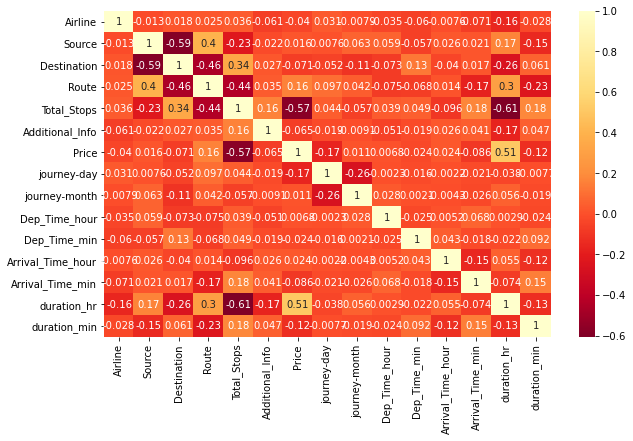

In [111]:
# Correlation Matrix ---Pearson Method
dfcor=ds.corr()
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap="YlOrRd_r",annot=True)

Key observation: fees is negatively correlated with total stops.
1)Price  is postively correlated with duration column 

# Finding Outliers and Skewness

Price                   AxesSubplot(0.125,0.125;0.0435393x0.755)
journey-day          AxesSubplot(0.177247,0.125;0.0435393x0.755)
journey-month        AxesSubplot(0.229494,0.125;0.0435393x0.755)
Dep_Time_hour        AxesSubplot(0.281742,0.125;0.0435393x0.755)
Dep_Time_min         AxesSubplot(0.333989,0.125;0.0435393x0.755)
Arrival_Time_hour    AxesSubplot(0.386236,0.125;0.0435393x0.755)
Arrival_Time_min     AxesSubplot(0.438483,0.125;0.0435393x0.755)
duration_hr           AxesSubplot(0.49073,0.125;0.0435393x0.755)
duration_min         AxesSubplot(0.542978,0.125;0.0435393x0.755)
dtype: object

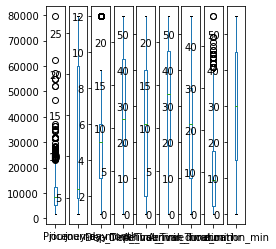

In [41]:
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,15))

We can see there are outliers in price,duration_hr.Lets check separately.

<AxesSubplot:>

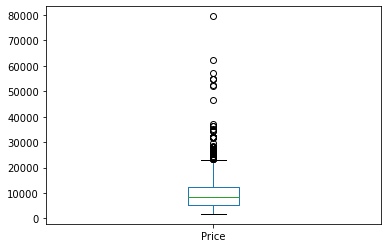

In [42]:
ds['Price'].plot.box()

<AxesSubplot:>

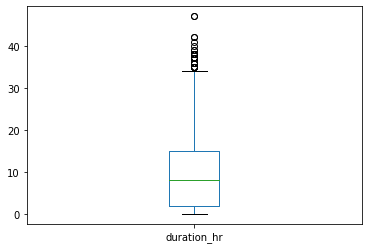

In [43]:
ds['duration_hr'].plot.box()

Outliers are presnent in price and  duration_hr

In [44]:
# Cheking skew.
ds.skew()

Price                1.812405
journey-day          0.367212
journey-month        0.629556
Dep_Time_hour        0.112924
Dep_Time_min         0.167234
Arrival_Time_hour   -0.370146
Arrival_Time_min     0.110945
duration_hr          0.851197
duration_min        -0.090680
dtype: float64

Data Wrangling

In [45]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
oe =  OrdinalEncoder()
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i]=oe.fit_transform(ds[i].values.reshape(-1,1))

In [47]:
ds

Airline  Source  Destination  Route  Total_Stops  Additional_Info  \
0          3.0     0.0          5.0   18.0          4.0              8.0   
1          1.0     3.0          0.0   84.0          1.0              8.0   
2          4.0     2.0          1.0  118.0          1.0              8.0   
3          3.0     3.0          0.0   91.0          0.0              8.0   
4          3.0     0.0          5.0   29.0          0.0              8.0   
...        ...     ...          ...    ...          ...              ...   
10678      0.0     3.0          0.0   64.0          4.0              8.0   
10679      1.0     3.0          0.0   64.0          4.0              8.0   
10680      4.0     0.0          2.0   18.0          4.0              8.0   
10681     10.0     0.0          5.0   18.0          4.0              8.0   
10682      1.0     2.0          1.0  108.0          1.0              8.0   

       Price  journey-day  journey-month  Dep_Time_hour  Dep_Time_min  \
0       3897           24              3             22            20   
1       7662            5              1              5            50   
2      13882            6              9              9            25   
3       6218            5             12             18             5   
4      13302            3              1             16            50   
...      ...          ...            ...            ...           ...   
10678   4107            4              9             19            55   
10679   4145           27              4             20            45   
10680   7229           27              4              8            20   
10681  12648            3              1             11            30   
10682  11753            5              9             10            55   

       Arrival_Time_hour  Arrival_Time_min  duration_hr  duration_min  
0                      1                10            2            50  
1                     13                15            7            25  
2                      4                25           19             0  
3                     23                30            5            25  
4                     21                35            4            45  
...                  ...               ...          ...           ...  
10678                 22                25            2            30  
10679                 23                20            2            35  
10680                 11                20            3             0  
10681                 14                10            2            40  
10682                 19                15            8            20  

[10682 rows x 15 columns]

In [48]:
# Removing outliers
m=ds[['Price','duration_hr']]

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(m))
z
threshold=3
print(np.where(z>3))

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   826,   936,   946,   959,   966,   969,   975,  1067,
        1113,  1196,  1246,  1341,  1346,  1424,  1442,  1466,  1478,
        1496,  1551,  1629,  1654,  1657,  1785,  1791,  1804,  1918,
        2055,  2099,  2108,  2172,  2495,  2553,  2556,  2618,  2635,
        2641,  2654,  2693,  2718,  2924,  3032,  3111,  3257,  3400,
        3457,  3535,  3700,  3790,  3815,  3966,  4012,  4047,  4118,
        4463,  4521,  4655,  4676,  4829,  5013,  5136,  5372,  5439,
        5516,  5662,  5701,  5701,  5710,  5711,  5719,  5738,  5745,
        5782,  5856,  5933,  5953,  5986,  6059,  6085,  6314,  6321,
        6407,  6476,  6576,  6588,  6605,  6884,  6991,  7189,  7232,
        7306,  7329,  7351,  7356,  7377,  7537,  7553,  7554,  7611,
        7612,  7617,  7713,  7724,  7756,  7876,  7902,  7906,  8020,
        8080,  8127,  8153,  8360,  8409,  8412,  8451,  8470,  8536,
        8598,  8601

In [50]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 38 rows will be droped

shape before remooving the outliers: (10682, 15)
shape after remooving the outliers: (10521, 15)


In [51]:
#Checkking skewness
dsnew.skew()

Airline              0.729344
Source              -0.436831
Destination          1.261683
Route               -0.504375
Total_Stops          0.615227
Additional_Info     -1.643691
Price                0.413956
journey-day          0.354866
journey-month        0.634044
Dep_Time_hour        0.103062
Dep_Time_min         0.171333
Arrival_Time_hour   -0.362282
Arrival_Time_min     0.107285
duration_hr          0.764223
duration_min        -0.097210
dtype: float64

Keeping the skewness range +0.5/-0.5, however we are not going to remove outliers from objet type variabels and target variabel

# Test Data Set

In [52]:
dsTest.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no null values in the dataset

In [53]:
#firstly lets convert Date_of_journey,Arrival_Time and Dep_Time variables into date and time for proper predicion
def change_into_datetime(col):
    dsTest[col]=pd.to_datetime(dsTest[col])

In [54]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [57]:
# Now we extract day and month from Date_of_journey and stored in 2 other columns
dsTest['journey-day']=dsTest['Date_of_Journey'].dt.day
dsTest['journey-month']=dsTest['Date_of_Journey'].dt.month
#now can drop 'Date_of_Journey' column
dsTest.drop('Date_of_Journey', axis=1, inplace=True)

In [58]:
# function for extracting hour and minutes From Arrival_time and Dept_time
def extract_hour(dsTest,col):
    dsTest[col+'_hour']=dsTest[col].dt.hour
    
def extract_min(dsTest,col):
    dsTest[col+'_min']=dsTest[col].dt.minute
    

def drop_col(dsTest,col):
    dsTest.drop(col,axis=1,inplace=True)

In [59]:
#call the function,Departure time is when a plane leaves the gate. 
# Similarly to Date_of_Journey,we can extract values from Dep_Time
extract_hour(dsTest,'Dep_Time')

#extracting minutes
extract_min(dsTest,'Dep_Time')

#drop the column
drop_col(dsTest,'Dep_Time')

In [60]:
#extracting hour
extract_hour(dsTest,'Arrival_Time')
#extracting min
extract_min(dsTest,'Arrival_Time')
#drop the column
drop_col(dsTest,'Arrival_Time')

In [61]:
# duration column,Separate hours and minute from duration
duration=list(dsTest['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [62]:
dsTest['Duration']=duration

In [63]:
# duration column,Separate hours and minute from duration
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [64]:
dsTest['duration_hr']=dsTest['Duration'].apply(hour)
dsTest['duration_min']=dsTest['Duration'].apply(minutes)
#drop the column
drop_col(dsTest,'Duration')

In [65]:
# Converting data type object into int
dsTest['duration_hr'] = dsTest['duration_hr'].astype(int)
dsTest['duration_min'] = dsTest['duration_min'].astype(int)

In [66]:
dsTest

Airline    Source Destination            Route Total_Stops  \
0           Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
1                IndiGo   Kolkata    Banglore  CCU → MAA → BLR      1 stop   
2           Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
3     Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   
4              Air Asia  Banglore       Delhi        BLR → DEL    non-stop   
...                 ...       ...         ...              ...         ...   
2666          Air India   Kolkata    Banglore  CCU → DEL → BLR      1 stop   
2667             IndiGo   Kolkata    Banglore        CCU → BLR    non-stop   
2668        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
2669          Air India     Delhi      Cochin  DEL → BOM → COK      1 stop   
2670  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   

                  Additional_Info  journey-day  journey-month  Dep_Time_hour  \
0                         No info            6              6             17   
1                         No info            5             12              6   
2     In-flight meal not included           21              5             19   
3                         No info           21              5              8   
4                         No info           24              6             23   
...                           ...          ...            ...            ...   
2666                      No info            6              6             20   
2667                      No info           27              3             14   
2668                      No info            3              6             21   
2669                      No info            3              6              4   
2670                      No info           15              6              4   

      Dep_Time_min  Arrival_Time_hour  Arrival_Time_min  duration_hr  \
0               30                  4                25           10   
1               20                 10                20            4   
2               15                 19                 0           23   
3                0                 21                 0           13   
4               55                  2                45            2   
...            ...                ...               ...          ...   
2666            30                 20                25           23   
2667            20                 16                55            2   
2668            50                  4                25            6   
2669             0                 19                15           15   
2670            55                 19                15           14   

      duration_min  
0               55  
1                0  
2               45  
3                0  
4               50  
...            ...  
2666            55  
2667            35  
2668            35  
2669            15  
2670            20  

[2671 rows x 14 columns]

In [67]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
oe =  OrdinalEncoder()
for i in dsTest.columns:
    if dsTest[i].dtypes=='object':
        dsTest[i]=oe.fit_transform(dsTest[i].values.reshape(-1,1))

# Creating feature and target dataframe

In [69]:
x=dsnew.drop(columns=['Price'])
y=dsnew['Price']

In [70]:
x.shape

(10521, 14)

In [71]:
y.shape

(10521,)

In [72]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [73]:
# To find the best random state using Linear Regressor model

from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.5043332667915823 on random state 117


In [74]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7364, 14)
(3157, 14)
(7364,)
(3157,)


70% of the data (7364 rows) will be available for training the model & 30% (3157 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable as continuous values we can build the regression models. Therefore oue evalution criteria will be: Evaluation Matrics : MAE,MSE,RMSE and R2 Score

In [76]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.4680739093591617

In [77]:
lm.coef_

array([   88.2500878 ,  -263.91536111,   138.09695853,   -58.39890296,
       -1837.70297215,   348.1489596 ,  -424.40322886,   -21.15251585,
         126.64607348,   -84.80860456,  -115.86025558,   -30.7266971 ,
        1333.36165628,  -148.97353987])

In [78]:
lm.intercept_

8870.374786851524

In [79]:
from sklearn.metrics import r2_score
pred=lm.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute arror',mean_absolute_error(y_test,pred))
print('mean squarred arror',mean_squared_error(y_test,pred))
print('Root mean square arror',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.5043332667915823
mean absolute arror 2245.831279133482
mean squarred arror 8163642.941430104
Root mean square arror 2857.2089425574222


In [80]:
# Decision Tree Regression Model
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)

0.9953875021183417

In [81]:
from sklearn.metrics import r2_score
pred=dc.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.8606077612779154
mean absolute error 694.7110653574068
mean squarred error 2295793.5029607927
Root mean square error 1515.1876131228082


In [82]:
# KNeighbors Regression Model
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

0.8425819924973229

In [83]:
from sklearn.metrics import r2_score
pred=kn.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.7548947779540159
mean absolute error 1307.0178017104847
mean squarred error 4036888.864643649
Root mean square error 2009.2010513245432


In [84]:
# Random Forest Regression Model
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9858795276632525

In [85]:
from sklearn.metrics import r2_score
pred=rf.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9239109518294935
mean absolute error 600.0011501915623
mean squarred error 1253188.4417510505
Root mean square error 1119.4589951182002


Based on the results of above models, and capomaring the R2 score and other evalution matrics result of MAE,MSE and RMSE.We can find the Random Forest Regression model is best model to predict the . Since the Random Forest model has the second hishest score(0.98) and R2 score(0.92) and lowest values of MAE, MSE,RMSE among other four models build above, it is the best model among the above five models

# Improving the model accuracy using cross Validation

In [87]:
from sklearn.model_selection import cross_val_score
lmscores =cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.47633401 0.50615058 0.47864184 0.4547852  0.46838209]
0.4768587444891371 0.01685563248899822


In [88]:
from sklearn.model_selection import cross_val_score
dcscores =cross_val_score(dc,x,y,cv=5)
print(dcscores)
print(dcscores.mean(),dcscores.std())

[0.89256546 0.87800711 0.87345931 0.85556667 0.88689815]
0.8772993405895783 0.012749487874611479


In [89]:
from sklearn.model_selection import cross_val_score
knnscores =cross_val_score(kn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.73267033 0.71916855 0.72562887 0.70152325 0.70263568]
0.7163253358761986 0.012396022574196868


In [90]:
from sklearn.model_selection import cross_val_score
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.93131572 0.92765444 0.92375237 0.92171811 0.92470202]
0.9258285301401272 0.0033441948152755276


It can be observed that the "Random Forest Regressor" algorithim has the almost some positive accuracy score after the cross validation. So the best model with highet accuracy score and best on evalution with other matrix is "Random" is the best model for predicting the Price.

# HyperParameter Tuning


In [97]:
from sklearn.model_selection import GridSearchCV 
parameter={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt']}

In [98]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [99]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt']})

In [100]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'auto'}

In [103]:
rf_final=RandomForestRegressor(criterion= 'mse', max_depth= 30, max_features= 'sqrt')
rf_final.fit(x_train,y_train)
rf_final.score(x_train,y_train)

0.9843851942519574

In [104]:
from sklearn.metrics import r2_score
pred=rf_final.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9119022892955905
mean absolute error 725.9999148267527
mean squarred error 1450971.4006685137
Root mean square error 1204.5627425205023


# Saving the best Model

In [106]:
import joblib
joblib.dump(rf_final,'Model_Flight-Price.obj')

['Model_Flight-Price.obj']

# Predict the test data with the final model¶

In [107]:
#After that we are going to turn that into a dataframe.
#Then we will produce a 'sample_submission.csv'

y_pred_fee=rf_final.predict(dsTest)

In [108]:
# Rounding off decimal values
def rounding(x):
    m=(x//50)*50
    if m==x:
        return int(x/1.0)
    elif x-m>=25.0:
        return int((m+50)/1.0)
    else:
        return int(m/1.0)

In [109]:
# Predicting the fee 
y_fin=[]
for i in range(len(y_pred_fee)):
    y_fin.append(rounding(y_pred_fee[i]))
y_fin=pd.DataFrame({'id':np.arange(1,len(y_fin)+1,1),'Fees':y_fin})
print(y_fin.head())

   id   Fees
0   1  11050
1   2  10550
2   3  11150
3   4  10950
4   5   8200


In [110]:
y_fin.to_csv('final_submission_fee.csv',index=False)